In [1]:
import tweepy

In [2]:
import config

In [3]:
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth)
tweets = api.search("#covid19", count=100)
for tweet in tweets:
    print(tweet.text)

"Happy" Friday! We just broke another record in Michigan for the highest daily total of #COVID19 cases. Over 9700 c… https://t.co/u3fJjdz1Iz
RT @LMucchielli: Le scandale du #Remdesivir éclate. Il éclabousse l'OMS, le ministère de la Santé, l'ANSM et le Conseil scientifique #COVID…
RT @BuildBackBlue: WARNING: America's airports are about to become #COVID19 super spreaders. Think twice before flying.
RT @Tu_IMSS_TAM: El #IMSSTamaulipas reconoce a la Lic. Abril Alicia Turrubiates Peña, Enfermera General, por obtener la  #CondecoraciónMigu…
The Latest: 1 Death, 95 New #COVID19 Cases Reported Today; Caldwell, Green Spar Over Surveillance Testing; Rail Pub… https://t.co/2le2L9A45x
RT @gorgepulse: Washington state's #COVID19 risk level has increased to "critical" according to https://t.co/fDONP3Wm7l. Oregon is the only…
RT @ActualAlexZ: NEW: Sen. @KipBateman tells me he's self-isolating after chief of staff and chief of staff's wife tested positive for #COV…
RT @SagesseIslamic: 🕋 La Ka'ba ava

In [4]:
ids = api.followers_ids(screen_name="TheWeeknd", count=10)
for user in api.lookup_users(user_ids=ids):
    print("https://twitter.com/{}".format(user.screen_name))


https://twitter.com/phat37649964
https://twitter.com/COSMICSSHANIA
https://twitter.com/YiselMuoz2
https://twitter.com/Marely77418388
https://twitter.com/daxter_v
https://twitter.com/sairacnco
https://twitter.com/edonesinani
https://twitter.com/damysphere
https://twitter.com/BrisaMelanie12
https://twitter.com/m_francisca2


In [8]:
#Reminder to get current user mention(for us we can use brand's name in this)
tweets_mentions = api.mentions_timeline(count=10)
for tweet in tweets_mentions:
    print(tweet.text)

In [9]:
#Oh God no one mentions me hahahhaah

In [ ]:
#Not fully implemented 
from twilio.rest import Client
def send_message(tweet, phone_number):
    account_sid = config.account_sid
    auth_token = config.twilio_auth_token
    client = Client(account_sid, auth_token)
    message = Client.messages \
        .create(
            body = tweet,
            from_= config.from_phone_number,
            to =  phone_number
        )
    return "Message sent with id {}".format(message.sid)
tweets = api.search("ravens", count=10)
tweet = tweets[0]
sid = send_message(tweet.text, "some phone number here")
print(sid)

In [6]:
#lets analyze 


In [8]:
my_timeline = api.home_timeline(count=10)
type(my_timeline)

tweepy.models.ResultSet

In [9]:
help(my_timeline)

Help on ResultSet in module tweepy.models object:

class ResultSet(builtins.list)
 |  ResultSet(max_id=None, since_id=None)
 |  
 |  A list like object that holds results from a Twitter API query.
 |  
 |  Method resolution order:
 |      ResultSet
 |      builtins.list
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, max_id=None, since_id=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ids(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  max_id
 |  
 |  since_id
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from builtins.list:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Retu

In [12]:
dir(my_timeline)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_max_id',
 '_since_id',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'ids',
 'index',
 'insert',
 'max_id',
 'pop',
 'remove',
 'reverse',
 'since_id',
 'sort']

In [13]:
my_timeline.__dict__

{'_max_id': None, '_since_id': None}

In [16]:
type(my_timeline)

tweepy.models.ResultSet

In [22]:
one = my_timeline[0]

In [33]:
attributes = one._json.items()
attr_type = [type(x) for x in attributes]

In [35]:
#now lets use each attribute one by one

In [36]:
one.created_at # return a date time object

datetime.datetime(2020, 11, 20, 22, 31, 56)

In [37]:
one.id # return id of the tweet we don't need it that much

1329915407210225664

In [38]:
one.id_str # string version of id 

'1329915407210225664'

In [39]:
one.text # return the actual tweet which is very useful

'@michaelmontano\'s advice for our students: "stay curious and ask questions" #Codechella 🎡'

In [40]:
one.truncated # return whether the tweet is truncated version or not

False

In [41]:
one.entities.keys()

dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls'])

In [44]:
one.entities['hashtags']

[{'text': 'Codechella', 'indices': [76, 87]}]

In [47]:
one.entities['hashtags'][0]['text']

'Codechella'

In [48]:
#here is better way to get hashtags 
for elt in one.entities['hashtags']:
    print(elt['text'])

Codechella


In [50]:
one.entities['symbols'] # IDK what the hell this returns 

[]

In [51]:
one.entities['user_mentions'] # list of mentioned users 

[{'screen_name': 'michaelmontano',
  'name': 'Michael Montano',
  'id': 1228181,
  'id_str': '1228181',
  'indices': [0, 15]}]

In [54]:
for elt in one.entities['user_mentions']:
    print(elt['screen_name'])
    print(elt['name'])
    print(elt['id'])
    print(elt['id_str'])

#we need the id of mentioned user to know about the user more using id search

michaelmontano
Michael Montano
1228181
1228181


In [56]:
one.entities['urls'] #returns list of urls in tweets

[]

In [59]:
one.source #this might be very useful since it returns user's platform

'Twitter Web App'

In [60]:
one.in_reply_to_status_id

1329911362852556801

In [61]:
one.in_reply_to_status_id_str

'1329911362852556801'

In [62]:
one.in_reply_to_user_id

172442947

In [63]:
one.in_reply_to_user_id_str

'172442947'

In [64]:
one.in_reply_to_screen_name

'TwitterU'

In [65]:
one.user 

User(_api=<tweepy.api.API object at 0x7fe3f0220fd0>, _json={'id': 172442947, 'id_str': '172442947', 'name': 'TwitterU is @ #Codechella 🎡', 'screen_name': 'TwitterU', 'location': 'San Francisco', 'description': "We're your one stop shop for anything University related. That means campus outreach, student advice/tips, & of course, our University Recruiting efforts!", 'url': 'https://t.co/connect', 'entities': {'url': {'urls': [{'url': 'https://t.co/connect', 'expanded_url': 'https://connectwithtwitteru.splashthat.com/', 'display_url': 'connectwithtwitteru.splashthat.com', 'indices': [0, 20]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 181704, 'friends_count': 235, 'listed_count': 933, 'created_at': 'Thu Jul 29 18:41:46 +0000 2010', 'favourites_count': 10133, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 11287, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 

In [57]:
one._json.keys()


dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [68]:
one.geo #return geographic location if available else return None

NoneType

In [70]:
one.coordinates   #return latitude longtiude coordinate if available else return None

NoneType

In [72]:
one.place # return place if available else return None

In [73]:
one.contributors

In [74]:
one.is_quote_status

False

In [75]:
one.retweet_count

1

In [76]:
one.favorite_count

3

In [77]:
one.favorited

False

In [78]:
one.retweeted

False

In [79]:
one.lang

'en'


# lets do some more fun

In [81]:
api

In [82]:
dir(api)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_list_members',
 '_lookup_friendships',
 '_pack_image',
 '_remove_list_members',
 '_send_direct_message',
 'add_list_member',
 'add_list_members',
 'api_root',
 'auth',
 'blocks',
 'blocks_ids',
 'cache',
 'cached_result',
 'compression',
 'configuration',
 'create_block',
 'create_favorite',
 'create_friendship',
 'create_list',
 'create_media_metadata',
 'create_mute',
 'create_saved_search',
 'destroy_block',
 'destroy_direct_message',
 'destroy_favorite',
 'destroy_friendship',
 'destroy_list',
 'destroy_mute',
 'destroy_saved_search',
 'destroy_status',
 'favorites',
 'followers',
 'followers_ids',
 'friends',
 

In [86]:
name_of = one.user.screen_name
user = api.get_user(name_of)

In [94]:
user._json.keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [88]:
user.screen_name

'TwitterU'

In [89]:
user.name

'TwitterU is @ #Codechella 🎡'

In [90]:
user.followers_count

181696

In [91]:
for frnd in user.friends():
    print(frnd.screen_name)

ShayLovesSports
sacnas
TwitterUK
janthethird
saterday32
DardenMBA
MichiganRoss
MBAatUNC
EmoryGoizueta
UTexasMBA
DukeFuqua
PearlHacks
nyit
NTUsg
SmartRecruiters
MillsCollege
LehmanCollege
CityCollegeNY
STEM_Institute
NJIT


In [92]:
user.followers

<bound method User.followers of User(_api=<tweepy.api.API object at 0x7fe3f0220fd0>, _json={'id': 172442947, 'id_str': '172442947', 'name': 'TwitterU is @ #Codechella 🎡', 'screen_name': 'TwitterU', 'location': 'San Francisco', 'profile_location': None, 'description': "We're your one stop shop for anything University related. That means campus outreach, student advice/tips, & of course, our University Recruiting efforts!", 'url': 'https://t.co/connect', 'entities': {'url': {'urls': [{'url': 'https://t.co/connect', 'expanded_url': 'https://connectwithtwitteru.splashthat.com/', 'display_url': 'connectwithtwitteru.splashthat.com', 'indices': [0, 20]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 181696, 'friends_count': 235, 'listed_count': 932, 'created_at': 'Thu Jul 29 18:41:46 +0000 2010', 'favourites_count': 10133, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 11287, 'lang': None, 'status': {'created_at': 'Fri 

# Word cloud
    A graphical display of words in a corpus 
    size of word based on number of occurrences. the more the occurrences the bigger the size and vise versa
    visual view of the most popular terms

In [93]:
#lets get Donald J Trump's tweets

In [106]:
trump = api.get_user('realDonaldTrump')
trump_name = trump.screen_name

In [107]:
trump_tweets = api.user_timeline(screen_name=trump_name, count=200,  include_rts = False, tweet_mode = 'extended')

In [108]:
len(trump_tweets)


126

In [110]:
tweet = trump_tweets[0]

In [112]:
tweet

Status(_api=<tweepy.api.API object at 0x7fe3f0220fd0>, _json={'created_at': 'Fri Nov 20 19:38:34 +0000 2020', 'id': 1329871776889925636, 'id_str': '1329871776889925636', 'full_text': '...Why won’t they do it, and why are they so fast to certify a meaningless tally?', 'truncated': False, 'display_text_range': [0, 81], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1329871775707107335, 'in_reply_to_status_id_str': '1329871775707107335', 'in_reply_to_user_id': 25073877, 'in_reply_to_user_id_str': '25073877', 'in_reply_to_screen_name': 'realDonaldTrump', 'user': {'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/8f9VFxztEJ', 'entities': {'url': {'urls': [{'url': 'https://t.co/

In [115]:
for i in range(10):
    tweet = trump_tweets[i]
    print(tweet.full_text)
    print(tweet.created_at)
    print('\n')

...Why won’t they do it, and why are they so fast to certify a meaningless tally?
2020-11-20 19:38:34


The Governor of Georgia, and Secretary of State, refuse to let us look at signatures which would expose hundreds of thousands of illegal ballots, and give the Republican Party and me, David Perdue, and perhaps Kelly Loeffler, a BIG VICTORY...
2020-11-20 19:38:33


News Conference on Reduced Drug Prices at 2:30 P.M.
2020-11-20 18:20:41


Giuliani: The Case for Election Fraud Being Made By Americans https://t.co/yNfaKqYzCO via @BreitbartNews
2020-11-20 13:53:00


We have great support on the Election Hoax! https://t.co/ChpkuZvc4s
2020-11-20 13:35:44


Thank you Elizabeth, LOVE! https://t.co/iopJ0AJ1KV
2020-11-20 13:01:17


The great @FoxNews daytime ratings CRASH will only get worse! https://t.co/GdOWwV7EOY
2020-11-20 12:56:13


RINO Mitt Romney should read this. I’m sure, however, that he feels he got slaughtering by Obama “fair and square”. https://t.co/GGZKfSAp8z
2020-11-20 12:52:49

In [116]:
!pip install wordcloud

     |████████████████████████████████| 366 kB 82 kB/s eta 0:00:011


In [123]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
trump_tweets_text = str([tweet.full_text for tweet in trump_tweets])
word_cloud = WordCloud(stopwords=stopwords, max_words=25, \
                      background_color="white").generate(trump_tweets_text)

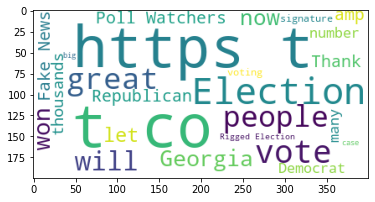

In [124]:
import matplotlib.pyplot as plt
plt.imshow(word_cloud)

In [125]:
# as we can see there are some words needs to be ignored lets do that
stopwords.update(['https', 't', 'co', 'many'])
word_cloud = WordCloud(stopwords=stopwords, max_words=10, \
                      background_color="azure").generate(trump_tweets_text)

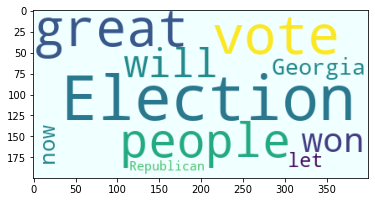

In [126]:
plt.imshow(word_cloud)

# Sentiment Analysis
    identify and categorize intent or opinion in text data 
    ==>in sentiment analysis we want to determine sentence's polarity ranging from -1 to 1 
    +1(postive)
    -1(negative)
     0(neutral)
    ==> we also want to understand whether the sentiment is objective or subjective
     0(objective)
    +1(subjective)

In [127]:
# to implement sentiment analysis we can use the bag of words technique

In [129]:
!pip install textblob

     |████████████████████████████████| 636 kB 115 kB/s eta 0:00:01


In [130]:
from textblob import TextBlob

In [140]:
trump_tweets_list = [tweet.full_text for tweet in trump_tweets]
print('{:40}:{:10}:{:10}'.format('Review', 'Polarity', 'Subjectivity'))
for tweet in trump_tweets_list:
    sentiment = TextBlob(tweet)
    print('{:40} :   {: 01.2f}   :   {:01.2f}'.format(tweet[:40]\
                                                     ,sentiment.polarity, sentiment.subjectivity))

Review                                  :Polarity  :Subjectivity
...Why won’t they do it, and why are the :   -0.15   :   0.80
The Governor of Georgia, and Secretary o :   -0.25   :   0.30
News Conference on Reduced Drug Prices a :    0.00   :   0.00
Giuliani: The Case for Election Fraud Be :    0.00   :   0.00
We have great support on the Election Ho :    1.00   :   0.75
Thank you Elizabeth, LOVE! https://t.co/ :    0.62   :   0.60
The great @FoxNews daytime ratings CRASH :    0.10   :   0.78
RINO Mitt Romney should read this. I’m s :    0.60   :   0.89
@justin_hart There will be no lockdowns  :    0.07   :   0.47
Will use these charts in court case. The :    0.00   :   0.00
A Rigged Election! https://t.co/dAviFrkE :    0.00   :   0.00
Great book! https://t.co/Aq4Qus3u4r      :    1.00   :   0.75
Look at this in Michigan! A day AFTER th :    0.00   :   0.00
So true. Thanks Jody! https://t.co/YnOpH :    0.30   :   0.43
https://t.co/lJa6syVoqN                  :    0.00   :   0.00
We wi

In [141]:
# Summerizing sentiment data

Final summarized counts :  [77, 24, 25]
Pie Presentation 
 ----------------------


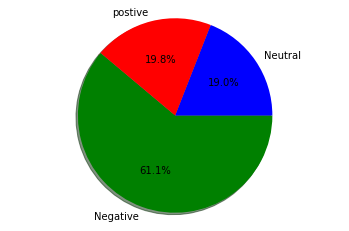

In [142]:
labels = ['Negative', 'Neutral', 'postive']
values = [0, 0, 0] #initializing count array
for tweet in trump_tweets_list:
    sentiment = TextBlob(tweet)
    polarity = round((sentiment.polarity +1) *3) %3
    values[polarity] = values[polarity] + 1
print("Final summarized counts : ", values)
colors = ['Green', 'Blue', 'Red']
print("Pie Presentation \n ----------------------")
plt.pie(values, labels=labels, colors=colors, 
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()